1. Descripción de la arquitectura apoyándose en el artículo original.

In [1]:
# Importar las librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Definir la ruta a las imágenes
folder_path = "./Imagenes_para_exposiciones_Grupo_2"
labels = []
imagenes_list = []

for image_name in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path, image_name), target_size=(224, 224))
    label = image_name.split('_')[0]
    labels.append(label)
    imagenes_list.append(img_to_array(img))

In [3]:
# Convertir palabras a números
def palabras_a_numeros(lista_palabras):
    sorted_unique = sorted(set(lista_palabras))
    palabra_numero = {palabra: i + 1 for i, palabra in enumerate(sorted_unique)}
    return [palabra_numero[palabra] for palabra in lista_palabras]


In [4]:
# Preparar datos y etiquetas
labels = palabras_a_numeros(labels)
labels = to_categorical(labels)  # Convertir a formato one-hot
images = np.array(imagenes_list, dtype='float32')
images = preprocess_input(images)  # Preprocesamiento específico de MobileNet

In [5]:
len(labels)

100

In [6]:
labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=57)
print("x_train shape = "  ,x_train.shape)
print("y_train shape = "  ,y_train.shape)
print("\nx_test shape = " ,x_test.shape)
print("y_test shape = "   ,y_test.shape)

x_train shape =  (80, 224, 224, 3)
y_train shape =  (80, 45)

x_test shape =  (20, 224, 224, 3)
y_test shape =  (20, 45)


2. Implementación (incluyendo argumentos para iniciar el modelo con Keras)

In [8]:
# Cargar modelo MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(y_train.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compilar y entrenar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
3/3 [==============================] - 9s 473ms/step - loss: 4.1919 - accuracy: 0.0625 - val_loss: 3.9914 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 117ms/step - loss: 0.3244 - accuracy: 0.9500 - val_loss: 5.2693 - val_accuracy: 0.1000
Epoch 3/100
3/3 [==============================] - 0s 137ms/step - loss: 0.0968 - accuracy: 0.9875 - val_loss: 5.0833 - val_accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 137ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 5.3359 - val_accuracy: 0.2000
Epoch 5/100
3/3 [==============================] - 0s 137ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 5.7583 - val_accuracy: 0.3500
Epoch 6/100
3/3 [==============================] - 0s 128ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 6.3259 - val_accuracy: 0.3000
Epoch 7/100
3/3 [==============================] - 0s 137ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 6.8981 - val_accuracy: 0.2500
Epoch 8/100
3

In [10]:
# Función para visualizar las métricas de entrenamiento
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Esactitud')
    plt.ylabel('accuracy')
    plt.xlabel('Epocas')
    plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Pérdida')
    plt.ylabel('Loss')
    plt.xlabel('Epocas')
    plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
    plt.show()

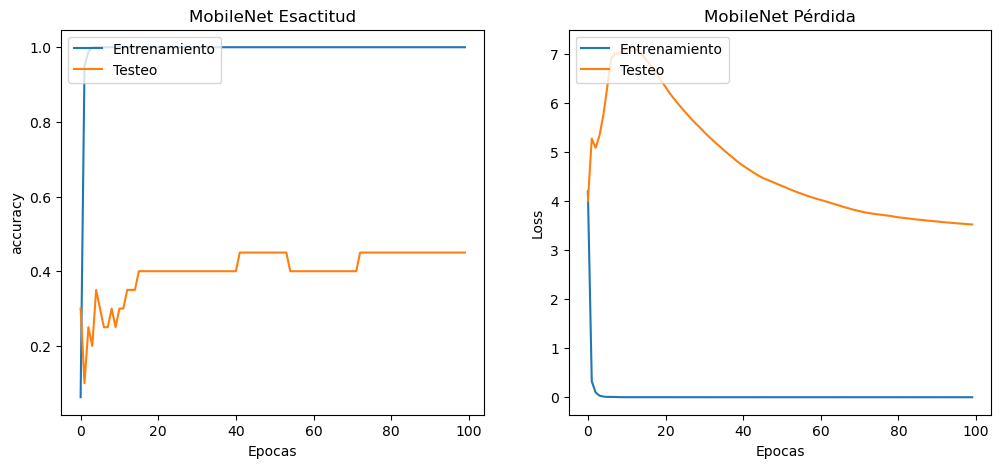

In [11]:
# Visualizar resultados del modelo
plot_history(history, 'MobileNet')

3. Aplicación del modelo en el conjunto de imágenes asignadas al grupo.
Discutir los resultados mostrando las clases presentes en sus datos.

In [12]:
# Evaluación del modelo
eval_result = model.evaluate(x_test, y_test)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

1/1 [==============================] - 0s 51ms/step - loss: 3.5204 - accuracy: 0.4500
Test Loss: 3.5203986167907715, Test Accuracy: 0.44999998807907104


In [13]:
# Mostrar el sumario del modelo y hacer predicciones
model.summary()
preds = model.predict(x_test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

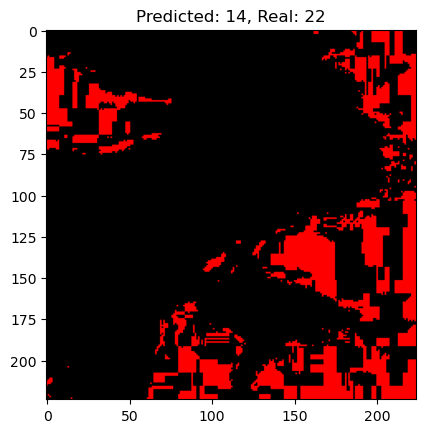

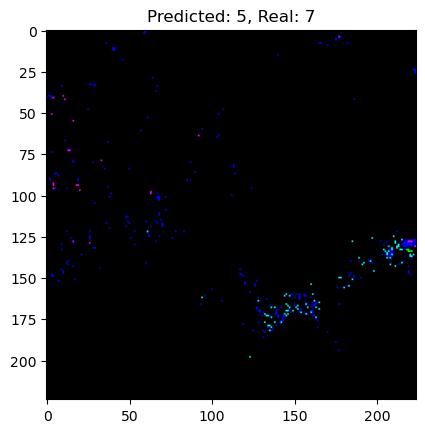

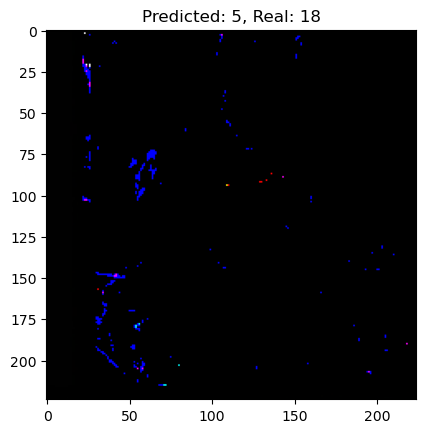

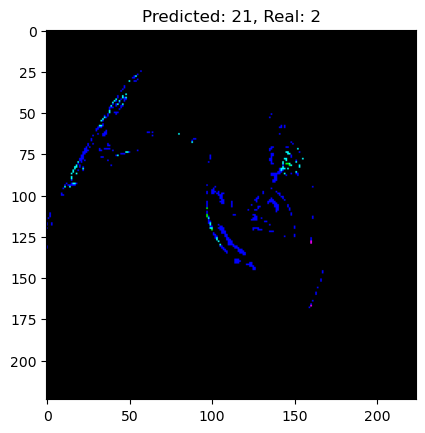

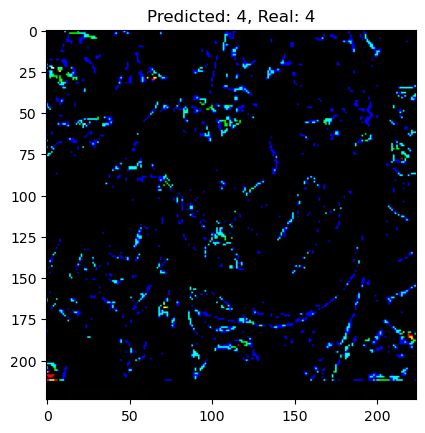

In [14]:
# Visualización de predicciones
for i, pred in enumerate(preds[:5]):
    plt.imshow(x_test[i].astype('uint8'))
    plt.title(f'Predicted: {np.argmax(pred)}, Real: {np.argmax(y_test[i])}')
    plt.show()
